# CZ4041 - Course Project - Taxi Fare

# Exploratory Data Analysis

## Importing the Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb
import datetime as dt
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from math import *
import json
import plotly.io as pio
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

## Loading the Datasets

In [18]:
df_train = pd.read_csv("D:/ML Files/train.csv")

In [12]:
df_train_2 = pd.read_csv("D:/ML Files/train.csv", nrows=1000)

### Understanding Dataset we are working with

We will explore the dataset so as to identify the outliers and remove noise in dataset.

In [3]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
print("df_train shape:",df_train.shape)

df_train shape: (55423856, 8)


In [5]:
columns = df_train.columns
print("Columns:", list(columns))
print("Number of Columns:", len(columns))

Columns: ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
Number of Columns: 8


In [7]:
df_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [11]:
print("Checking for Null Values in dataset...")
df_train.isnull().sum()

Checking for Null Values in dataset...


key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

There exisits NULL values for the longtitude and latitude values which would need to be removed later.

## Visualisation of Data

### Fare amount
Understanding the prediction labels that we are working with

In [13]:
df_train["fare_amount"].describe()

count    5.542386e+07
mean     1.134505e+01
std      2.071083e+01
min     -3.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      9.396336e+04
Name: fare_amount, dtype: float64

In [14]:
df_train["fare_amount"].value_counts()

6.50      2691783
4.50      2270305
8.50      2080476
5.30      1623420
5.70      1620795
           ...   
147.16          1
52.29           1
82.13           1
203.10          1
64.46           1
Name: fare_amount, Length: 9969, dtype: int64

In [16]:
print("Max of fare_amount is", df_train["fare_amount"].max())

Max of fare_amount is 93963.36


In [17]:
print("Min of fare_amount is", df_train["fare_amount"].min())

Min of fare_amount is -300.0


In [20]:
df_train[df_train['fare_amount'] < 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,2013-08-30 08:57:10.0000002,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,2013-08-11 13:39:10.0000001,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,2015-04-30 15:19:45.0000003,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
...,...,...,...,...,...,...,...,...
55319537,2010-03-31 10:13:10.0000002,-12.1,2010-03-31 10:13:10 UTC,-73.989360,40.772995,-73.947843,40.772062,1
55326598,2010-03-27 00:41:10.0000004,-19.3,2010-03-27 00:41:10 UTC,-73.984128,40.739660,-73.904713,40.772890,1
55337328,2015-02-07 10:48:18.0000006,-2.5,2015-02-07 10:48:18 UTC,-73.961197,40.711250,-73.961517,40.711300,6
55360368,2015-06-21 00:32:32.0000004,-2.5,2015-06-21 00:32:32 UTC,-73.999550,40.738613,-73.999550,40.738613,1


From the analysis, it is observed that there were negative amounts in the fare amount.
Although we try not to clean any data points related to the y labels, we decided that leaving negative fare amounts were illogical values and removed them in our dataset.


### Longitude and Latitude

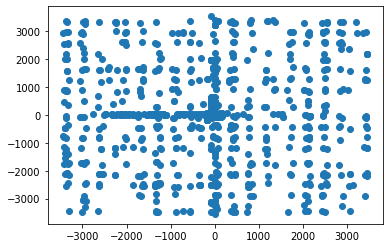

In [26]:
plt.scatter(x=df_train['dropoff_longitude'], y=df_train['dropoff_latitude'])
plt.show()

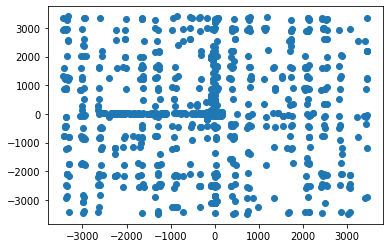

In [27]:
plt.scatter(x=df_train['pickup_longitude'], y=df_train['pickup_latitude'])
plt.show()

Several points of the pickup and dropoff locations were visualized on the world map using the Plotly library. Longitude and latitude points with [0,0] were observed in our dataset and as the project only involves the NYC state, they were deemed as irrelevant and were removed from the dataset.

In [16]:
pio.renderers.default = 'iframe'
fig = px.scatter_geo(df_train_2,lat='dropoff_latitude',lon='dropoff_longitude', hover_name="key")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [17]:
fig = px.scatter_geo(df_train_2,lat='pickup_latitude',lon='pickup_longitude', hover_name="key")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

### Passenger count
Plotting count plot to visualise distribution for fare amount.
It is seen from the figure that there are passenger_count of 0 or >10



By law, an NYC Taxi is allowed to carry only 4 passengers and 5 passengers, if it is a 5 seater car.
Passenger count of greater than 5 is only allowed if children aged 7 or above are seated on the laps of the adult passenger. From this, we concluded that the taxis could carry a maximum of 10 passengers. 
Hence, to ensure that this logic is not violated, we removed data points with passenger count of more than 10 or less than 1.


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

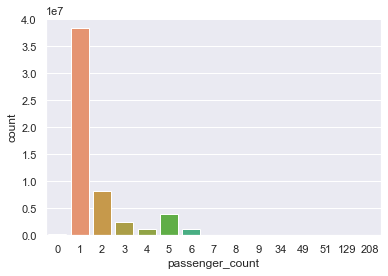

In [30]:
#Plotting a Countplot
sb.set_theme(style="darkgrid")
sb.countplot(x="passenger_count",data=df_train)

In [4]:
df_train_5 = pd.read_csv("checkpoint5_SGDR_traffic.csv")

In [24]:
df_train_6 = pd.read_csv("checkpoint5_SGDR_traffic.csv", nrows=1000)

In [8]:
df_train_5.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,weekend,holiday,peak_hour,hotspot,dist,0
count,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07,5.412594e+07
mean,1.133713e+01,-7.391647e+01,4.069293e+01,-7.391484e+01,4.069177e+01,1.691433e+00,3.041325e+00,4.368442e-01,2.091402e-02,2.223131e-01,2.374954e-01,4.646990e+00,3.652144e-01
std,2.085934e+01,7.863570e+00,7.508119e+00,7.890774e+00,7.639884e+00,1.307345e+00,1.948994e+00,4.959953e-01,1.430966e-01,4.158005e-01,4.255483e-01,8.732066e+01,2.173255e-01
min,0.000000e+00,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.493652e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.327085e-02
25%,6.000000e+00,-7.399228e+01,4.073652e+01,-7.399158e+01,4.073551e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.253296e+00,8.327085e-02
50%,8.500000e+00,-7.398209e+01,4.075335e+01,-7.398059e+01,4.075383e+01,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.153782e+00,3.830634e-01
75%,1.250000e+01,-7.396826e+01,4.076754e+01,-7.396528e+01,4.076839e+01,2.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.914821e+00,3.997408e-01
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,9.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.968880e+04,9.992716e-01


### Traffic Density

A boxplot was plotted for the traffic density to visualise the distribution of data based on the 5 summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”)

Text(0.5, 0, 'traffic_density')

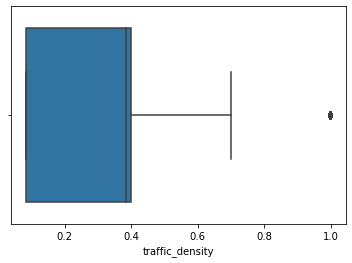

In [6]:
sb.boxplot(x=df_train_5["0"])
plt.xlabel("traffic_density")

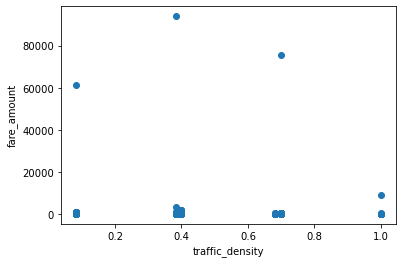

In [7]:
plt.scatter(x=df_train_5['0'], y=df_train_5['fare_amount'])
plt.xlabel("traffic_density")
plt.ylabel("fare_amount")
plt.show()

In [26]:
print("Min of fare_amount is", df_train_5["fare_amount"].min())

Min of fare_amount is 0.0


In [27]:
print("Max of fare_amount is", df_train_5["fare_amount"].max())

Max of fare_amount is 93963.36


### Location of pickup and drop off

In [28]:
fig = px.scatter_geo(df_train_6,lat='pickup_latitude',lon='pickup_longitude', hover_name="time")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [29]:

pio.renderers.default = 'iframe'
fig = px.scatter_geo(df_train_6,lat='dropoff_latitude',lon='dropoff_longitude', hover_name="time")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

### Distance vs Fare amount

The below figure is a comparison between the distance and fare amount. (Limited)

<AxesSubplot:title={'center':'Distance and Fare amount in NYC'}, xlabel='dist', ylabel='fare_amount'>

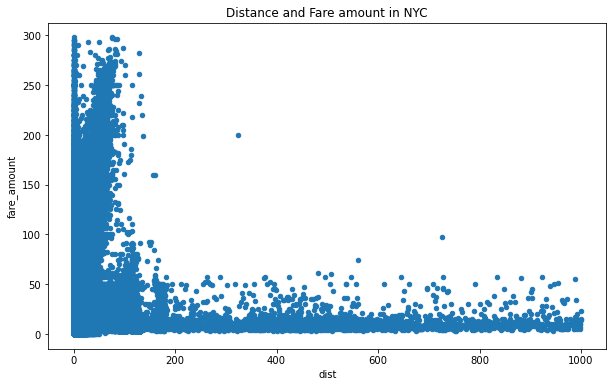

In [9]:
dist_cost = df_train_5[['dist', 'fare_amount']]
dist_cost = dist_cost[dist_cost['fare_amount']<300]
dist_cost = dist_cost[dist_cost['dist']<1000]
dist_cost.plot(x='dist', y= 'fare_amount', kind='scatter', figsize = (10,6), title = 'Distance and Fare amount in NYC')

### Passenger Count

After data cleaning the range of the passenger count was reduced to 1-9 which 1 being the majority passenger count.

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

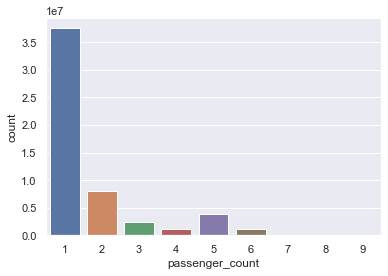

In [4]:
#Plotting a Countplot
sb.set_theme(style="darkgrid")
sb.countplot(x="passenger_count",data=df_train_5)

### Day

Using the features provided in the dataset, new features such as the day, weeekend, peak hour, holiday and hotspot was created. 

<AxesSubplot:xlabel='day', ylabel='count'>

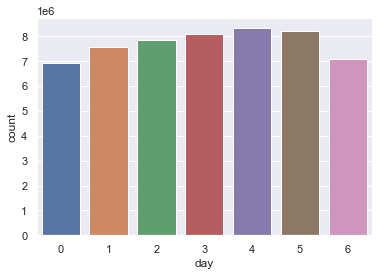

In [5]:
sb.countplot(x="day",data=df_train_5)

The count plot was used to show the distribution of the "days" in our dataset. 
(Monday - 0 to Sunday - 6)

### Weekend, Peak Hour, Holiday, Hotspot

<AxesSubplot:xlabel='weekend', ylabel='count'>

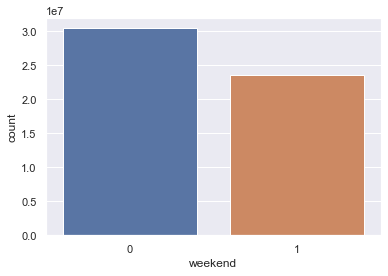

In [6]:
sb.countplot(x="weekend",data=df_train_5)

<AxesSubplot:xlabel='holiday', ylabel='count'>

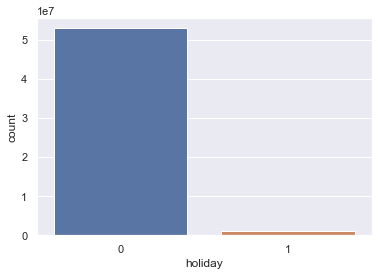

In [7]:
sb.countplot(x="holiday",data=df_train_5)

<AxesSubplot:xlabel='peak_hour', ylabel='count'>

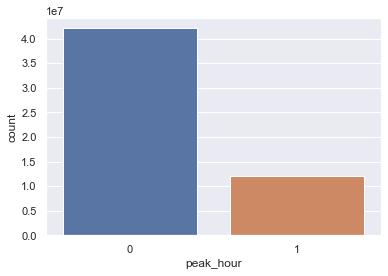

In [8]:
sb.countplot(x="peak_hour",data=df_train_5)

<AxesSubplot:xlabel='hotspot', ylabel='count'>

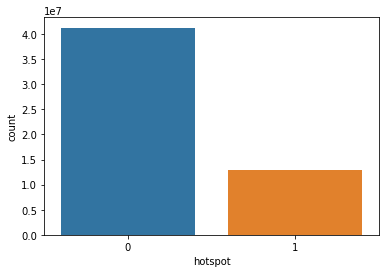

In [18]:
sb.countplot(x="hotspot",data=df_train_5)